This example is from https://www.tensorflow.org/tutorials/generative/autoencoder

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import tensorflow as tf

#from sklearn.metrics import accuracy_score, precision_score, recall_score
#from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model

In [6]:
#Defining model

latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)


In [7]:
#Compile and fit

autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

2022-06-29 00:10:03.624911: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-29 00:10:03.625603: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0239 - val_loss: 0.0134
Epoch 2/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0117 - val_loss: 0.0107
Epoch 3/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0101 - val_loss: 0.0098
Epoch 4/10
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0095 - val_loss: 0.0094
Epoch 5/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0092 - val_loss: 0.0092
Epoch 6/10
60000/60000 [==============================] - 8s 126us/sample - loss: 0.0091 - val_loss: 0.0092
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
60000/60000 [==============================] - 8s 129us/sample - loss: 0.00

In [8]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

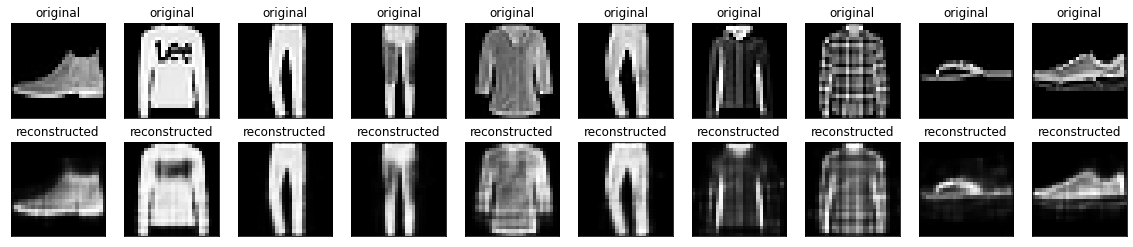

In [9]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()